In [24]:
import numpy as np
import pandas as pd
import statistics as sta
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from scipy import stats

In [25]:
df = pd.read_csv('Downloads\\Inc_Exp_Data.csv - Inc_Exp_Data.csv.csv')
df.sample(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
18,29000,6600,2,2000,348000,Graduate,1
34,46000,25000,5,3500,596160,Graduate,1
49,100000,40000,6,10000,1320000,Post-Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
22,34000,19000,6,0,330480,Professional,1
47,100000,30000,6,0,1404000,Graduate,3
40,60000,50000,6,10000,590400,Graduate,1
42,70000,9000,2,0,756000,Graduate,1
33,45000,22000,4,2500,610200,Post-Graduate,1
30,45000,25000,6,0,523800,Graduate,3


In [27]:
#Hàm describe để thống kê số liệu một cách ngắn gọn, đơn giản
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


Text(0, 0.5, 'Count')

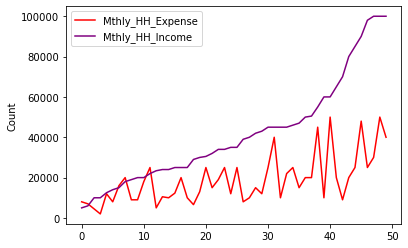

In [28]:
#Biểu đồ tương quan giữa Mthly_HH_Expense và Mthly_HH_Income
df[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot(color = ['red', 'purple'])
plt.ylabel('Count', )

#### Kiểu định lượng

In [29]:
dinh_luong = {}
columns_dluong = ['Mthly_HH_Income', 'Mthly_HH_Expense', 'Emi_or_Rent_Amt', 'Annual_HH_Income']
for column in columns_dluong:
    print(column)
    mo_ta = df[column].describe()
    print(mo_ta)
    dinh_luong[column] = df[column]
    print('')

Mthly_HH_Income
count        50.000000
mean      41558.000000
std       26097.908979
min        5000.000000
25%       23550.000000
50%       35000.000000
75%       50375.000000
max      100000.000000
Name: Mthly_HH_Income, dtype: float64

Mthly_HH_Expense
count       50.000000
mean     18818.000000
std      12090.216824
min       2000.000000
25%      10000.000000
50%      15500.000000
75%      25000.000000
max      50000.000000
Name: Mthly_HH_Expense, dtype: float64

Emi_or_Rent_Amt
count       50.000000
mean      3060.000000
std       6241.434948
min          0.000000
25%          0.000000
50%          0.000000
75%       3500.000000
max      35000.000000
Name: Emi_or_Rent_Amt, dtype: float64

Annual_HH_Income
count    5.000000e+01
mean     4.900190e+05
std      3.201358e+05
min      6.420000e+04
25%      2.587500e+05
50%      4.474200e+05
75%      5.947200e+05
max      1.404000e+06
Name: Annual_HH_Income, dtype: float64



In [30]:
data_dinh_luong = pd.DataFrame(dinh_luong)

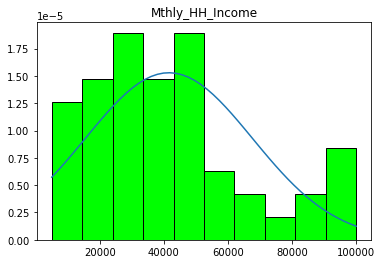

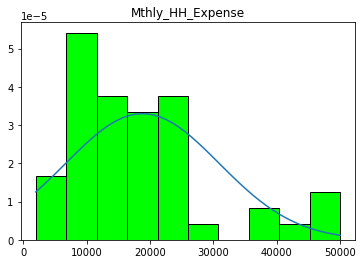

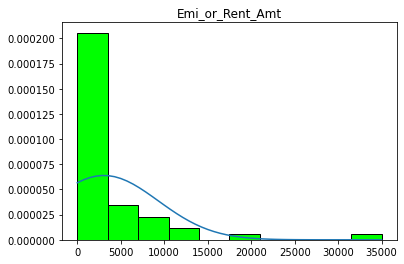

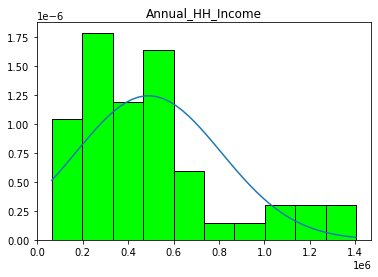

In [31]:
 for column in data_dinh_luong.columns:
    data = data_dinh_luong[column]   
    # kiểm tra data có chuẩn hay không?
    mean = np.mean(data)
    # ddof = 1 :: hiệu chỉnh
    std = np.std(data,ddof=1)
    domain = np.linspace(np.min(data),np.max(data))
    plt.plot(domain, stats.norm.pdf(domain, mean, std))
    # density = True :: chuẩn hóa dữ liệu về normal
    plt.hist(data, edgecolor='black', density = True, color="lime")
    plt.title(column)
    plt.show()

#### Kiểu định tính

In [65]:
dinh_tinh = {}
columns_dinh_tinh = ['No_of_Fly_Members', 'Highest_Qualified_Member', 'No_of_Earning_Members']
for column in columns_dinh_tinh:
    print(column)
    dinh_tinh[column] = df[column]
    print('')

No_of_Fly_Members

Highest_Qualified_Member

No_of_Earning_Members



In [66]:
df['No_of_Fly_Members'].value_counts()

4    15
6    10
3     9
2     8
5     5
7     2
1     1
Name: No_of_Fly_Members, dtype: int64

In [67]:
df['No_of_Earning_Members'].value_counts()

1    33
2    12
3     4
4     1
Name: No_of_Earning_Members, dtype: int64

In [68]:
df['Highest_Qualified_Member'].describe()

count           50
unique           5
top       Graduate
freq            19
Name: Highest_Qualified_Member, dtype: object

In [69]:
data_dinh_tinh = pd.DataFrame(dinh_tinh)

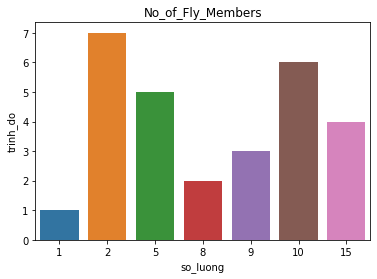

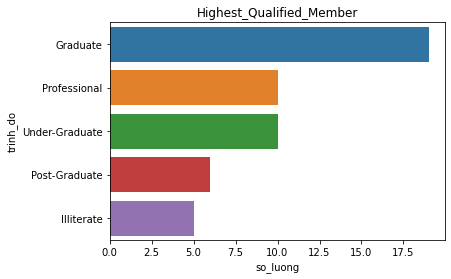

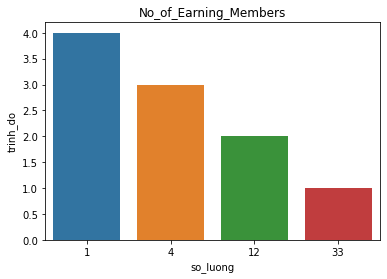

In [80]:
for column in data_dinh_tinh.columns:
    p = {}
    so_luong = []
    #print(data_dinh_tinh[column].value_counts())
    dem_data = data_dinh_tinh[column].value_counts()
    trinh_do = dem_data.index
    for i in dem_data:
        so_luong.append(i)
    p = {'trinh_do':trinh_do, 'so_luong':so_luong}
    data = pd.DataFrame(p)
    plt.title(column)
    sns.barplot(y = 'trinh_do', x= 'so_luong', data = data)
    plt.show()

#### Thống kê phần trăm thu nhập ở các mức rất cao, cao, trung bình, thấp

In [4]:
type_income = []
for x in df['Mthly_HH_Income']:
    if x <= 20000:
        type_income.append('Thấp')
    elif x <= 50000:
        type_income.append('Trung bình')
    elif x <= 80000:
        type_income.append('Cao')
    else:
        type_income.append('Rất cao')
df.insert(7, "Type_Income", type_income)
df.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp
5,14000,8000,2,0,196560,Graduate,1,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp
7,18000,20000,5,8000,216000,Graduate,1,Thấp
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp


In [5]:
#Rất cao >= 80000$ , Cao >= 50000$ , Trung bình >= 20000$, Thấp < 20000$
ti = df.groupby('Type_Income')['Type_Income'].count()
ti = pd.DataFrame(ti)
ti.columns = ['%']
phantram1 = (ti/sum(ti['%']))*100
phantram1

,%
Type_Income,
Cao,14.0
Rất cao,12.0
Thấp,22.0
Trung bình,52.0


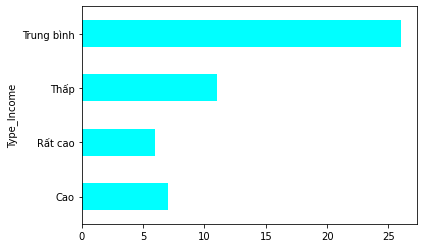

In [20]:
ti['%'].plot(x="Type_Income",
                 y="%",
                 kind="barh",
                 color="cyan")
plt.show()


In [8]:
type_expense = []

for x in df['Mthly_HH_Expense']:
    if x <= 8000:
        type_expense.append('Thấp')
    elif x <= 20000:
        type_expense.append('Trung bình')
    elif x <= 40000:
        type_expense.append('Cao')
    else:
        type_expense.append('Rất cao')
df.insert(8, "Type_Expense", type_expense)
df.head(15)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income,Type_Expense
0,5000,8000,3,2000,64200,Under-Graduate,1,Thấp,Thấp
1,6000,7000,2,3000,79920,Illiterate,1,Thấp,Thấp
2,10000,4500,2,0,112800,Under-Graduate,1,Thấp,Thấp
3,10000,2000,1,0,97200,Illiterate,1,Thấp,Thấp
4,12500,12000,2,3000,147000,Graduate,1,Thấp,Trung bình
5,14000,8000,2,0,196560,Graduate,1,Thấp,Thấp
6,15000,16000,3,35000,167400,Post-Graduate,1,Thấp,Trung bình
7,18000,20000,5,8000,216000,Graduate,1,Thấp,Trung bình
8,19000,9000,2,0,218880,Under-Graduate,1,Thấp,Trung bình
9,20000,9000,4,0,220800,Under-Graduate,2,Thấp,Trung bình


In [12]:
tp = df.groupby('Type_Expense')['Type_Expense'].count()
tp = pd.DataFrame(tp)
tp.columns = ['%']
phantram2 = (tp/sum(tp['%']))*100
phantram2

,%
Type_Expense,
Cao,24.0
Rất cao,8.0
Thấp,16.0
Trung bình,52.0


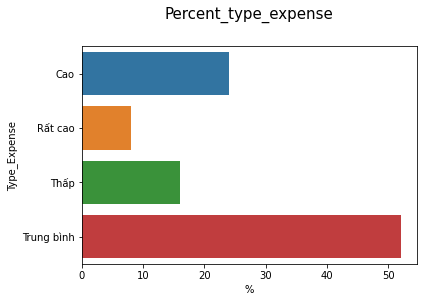

In [10]:
phantram2.reset_index(inplace=True)
sns.barplot(y='Type_Expense',
            x='%',
            data = phantram2 )
plt.title('Percent_type_expense',
          color = 'black',
          y = 1.1,
          fontsize = 15)
plt.show()

### Bảng thống kê chi phí nộp thêm hằng năm

In [13]:
chi_nam = df.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
chi_nam = pd.DataFrame(chi_nam)
chi_nam.columns = ['%']
phantram_nam = chi_nam/sum(chi_nam['%'])*100
phantram_nam

,%
Emi_or_Rent_Amt,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


<AxesSubplot:ylabel='Emi_or_Rent_Amt'>

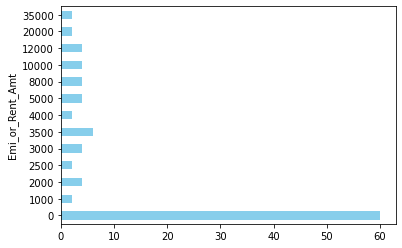

In [14]:
phantram_nam['%'].plot(x="Emi_or_Rent_Amt",
                       y="%",kind="barh",
                       color='skyblue')